In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.ops.numpy_ops import np_config

from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array

from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from scipy import stats

import os
import random
from collections import defaultdict

In [2]:
model = ResNet50(include_top=False, pooling='avg')

new_model = Sequential()
new_model.add(model)
new_model.add(Dense(1))

In [3]:
print(new_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [4]:
DIR = '/Users/kris.walsh/Desktop/test/'

In [5]:
df = pd.read_csv(DIR + 'ratings.csv')

In [6]:
all_images = defaultdict(list)

In [7]:
for filename, rating in df[['Filename', 'Rating']].values:
    all_images[filename].append(rating)

In [8]:
data = {}
for filename, ratings in all_images.items():
    data[filename] = np.mean(ratings)

In [9]:
ratings = dict(data)

In [10]:
images = []
ys = []
for filename in os.listdir(DIR + '/Images'):
    img_path = DIR + '/Images/' + filename
    img=load_img(img_path)
    img=img_to_array(img)
    images.append(img)
    ys.append(ratings[filename])

In [11]:
all_data = list(zip(images, ys))

In [12]:
random.shuffle(all_data)

In [13]:
train_size = int(len(all_data)*0.8)
train_data = all_data[:train_size]
test_data = all_data[train_size:]

In [14]:
train_images, train_ys = zip(*train_data)

In [15]:
test_images, test_ys = zip(*test_data)
test_images = list(test_images)
test_ys = list(test_ys)

4.6


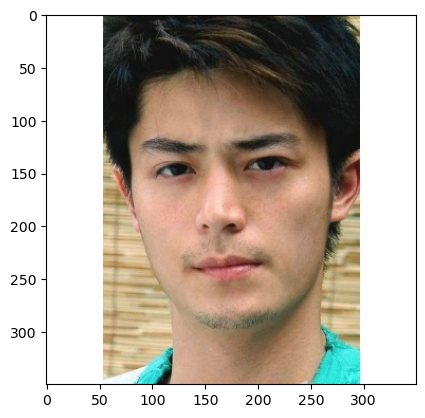

In [16]:
IND = np.argmax(test_ys)
plt.imshow(test_images[IND]/255.0)
print(test_ys[IND])
plt.show()

1.0166666666666666


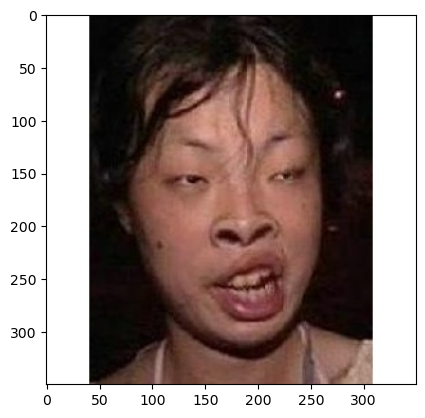

In [17]:
IND = np.argmin(train_ys)
plt.imshow(train_images[IND]/255.0)
print(train_ys[IND])
plt.show()

In [18]:
train_X = np.array(train_images)
print(train_X.shape)

(4400, 350, 350, 3)


In [19]:
train_Y = np.array(train_ys)
print(train_Y.shape)

(4400,)


In [20]:
test_X = np.array(test_images)
print(test_X.shape)

(1100, 350, 350, 3)


In [21]:
test_Y = np.array(test_ys)
print(test_Y.shape)

(1100,)


In [22]:
print(train_Y.shape)
print(test_Y.shape)

(4400,)
(1100,)


In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [24]:
new_model.compile(loss='mean_squared_error', optimizer=opt)

In [25]:
# new_model.fit(train_X, train_Y, batch_size=200, epochs=10)

In [26]:
# predicted = new_model.predict(test_X)

In [27]:
# plt.hist(predicted)

In [28]:
img_path = '/Users/kris.walsh/Desktop/test/charles.jpg'

In [29]:
img=load_img(img_path)
img=img_to_array(img)

In [30]:
dim = (350, 350)

In [31]:
img = tf.image.resize(img, dim)

In [32]:
print('Image Shape:', img.shape)

Image Shape: (350, 350, 3)


In [33]:
np_config.enable_numpy_behavior()

In [34]:
# p = new_model.predict(img.reshape((1,) + img.shape))